# Benefit of Multiplicative (MPL) Models over Nominal (Nom) Models of Systems
Testing actuator selection and feedback of Nominal and MPL models on simulations of True system

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_nom_vs_mpl, plot_simulation_nom_vs_mpl_1, plot_simulation_nom_vs_mpl_2, actuator_comparison

## Code

In [2]:
test_set = 'System Model 5'
S_True = sys_from_file(test_set + ' True')
S_MPL = sys_from_file(test_set + ' MPL')
S_Nom = sys_from_file(test_set + ' Nominal')

System read from file @ system_model/System Model 5 True.pickle 

System read from file @ system_model/System Model 5 MPL.pickle 

System read from file @ system_model/System Model 5 Nominal.pickle 



In [3]:
ret_sim = simulation_nom_vs_mpl(S_Nom, S_MPL, S_True)

## Output

#### System Models

##### True System

max(abs(eigvals(A)))= 0.8000


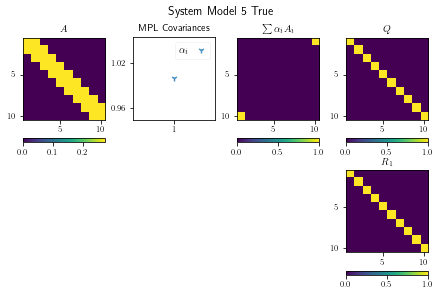

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True)

##### Nominal Model

max(abs(eigvals(A)))= 0.8000


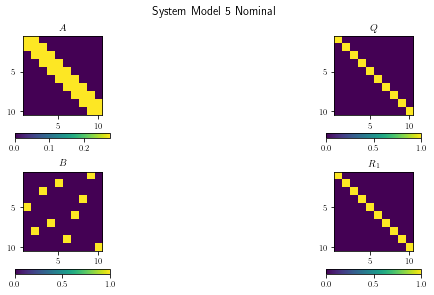

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_nom']['A'])))))
system_display_matrix(ret_sim['system_nom'])

##### Multiplicative Noise Model

max(abs(eigvals(A)))= 0.8000


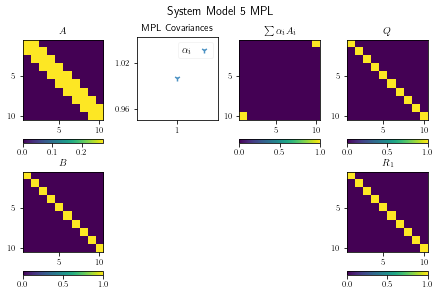

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_mpl']['A'])))))
system_display_matrix(ret_sim['system_mpl'])

#### Simulation - Trajectory, Control Input and Costs

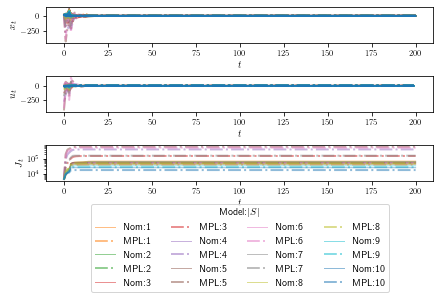

In [7]:
plot_simulation_nom_vs_mpl_1(ret_sim)

#### Actuator set comparison

Control sets are different


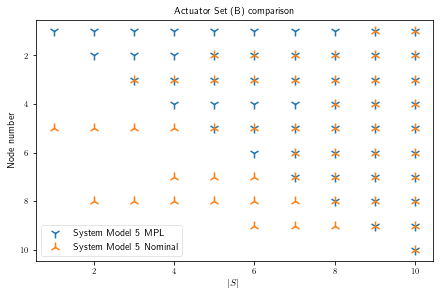

In [8]:
actuator_comparison(ret_sim['system_mpl'], ret_sim['system_nom'], disptext=True, figplt=True);

#### Simulated costs

In [9]:
print('True simulation cost with <___> feedback (4decimal approx)')
for key in ret_sim['T_Nom']['costs']:
    print ("|S|: %s | Nom: %.4f | MPL: %.4f | Diff (Nom-MPL) %.4f (%.4f %% of Nom)" % (key, ret_sim['T_Nom']['costs'][key][-1], ret_sim['T_MPL']['costs'][key][-1], ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1], (ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1])*100/ret_sim['T_Nom']['costs'][key][-1]))

True simulation cost with <___> feedback (4decimal approx)
|S|: 1 | Nom: 68440.7008 | MPL: 39529.7924 | Diff (Nom-MPL) 28910.9084 (42.2423 % of Nom)
|S|: 2 | Nom: 62093.8259 | MPL: 51479.7859 | Diff (Nom-MPL) 10614.0400 (17.0936 % of Nom)
|S|: 3 | Nom: 57292.0097 | MPL: 151726.7060 | Diff (Nom-MPL) -94434.6963 (-164.8305 % of Nom)
|S|: 4 | Nom: 56892.0316 | MPL: 419152.5166 | Diff (Nom-MPL) -362260.4850 (-636.7508 % of Nom)
|S|: 5 | Nom: 49743.6660 | MPL: 639606.8210 | Diff (Nom-MPL) -589863.1550 (-1185.8056 % of Nom)
|S|: 6 | Nom: 44013.8537 | MPL: 551243.8390 | Diff (Nom-MPL) -507229.9854 (-1152.4326 % of Nom)
|S|: 7 | Nom: 43757.6022 | MPL: 158385.8251 | Diff (Nom-MPL) -114628.2229 (-261.9618 % of Nom)
|S|: 8 | Nom: 43570.3181 | MPL: 50188.8254 | Diff (Nom-MPL) -6618.5073 (-15.1904 % of Nom)
|S|: 9 | Nom: 32916.4880 | MPL: 26936.2368 | Diff (Nom-MPL) 5980.2512 (18.1680 % of Nom)
|S|: 10 | Nom: 24667.8761 | MPL: 17147.8217 | Diff (Nom-MPL) 7520.0544 (30.4852 % of Nom)


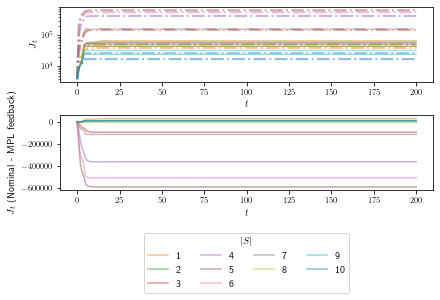

In [10]:
plot_simulation_nom_vs_mpl_2(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
